In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


REGION	Frequency
1. Lisbon	77
2. Oporto	47
3. Other Region	316

CHANNEL	Frequency
1. Horeca	298
2. Retail	142

Total	440

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv';
df = pd.read_csv(url);
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
# Normalizamos datos
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(df.iloc[:, 2:])
datos_normalizados

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [5]:
datos_normalizados_pd = pd.DataFrame(datos_normalizados, columns=df.columns[2:])
datos_normalizados_pd['Channel'] = df['Channel']
datos_normalizados_pd

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2
...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,2
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1


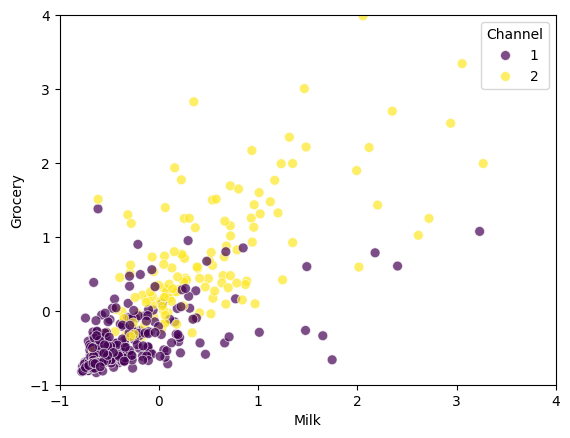

In [16]:
plt.xlim(-1, 4), plt.ylim(-1, 4)
ax = sns.scatterplot(data=datos_normalizados_pd, x='Milk', y='Grocery', hue='Channel', palette='viridis', s=50, alpha=0.7)
plt.show()


Vamos a probar a representar las compra de cada tipo de producto como un porcentaje sobre el total para tener en cuenta la proporción de compra en lugar de los totales. Es decir, centrarnos en **el perfil de consumo**, no el volumen total.

In [7]:
cols_productos = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df['Total'] = df[cols_productos].sum(axis=1)
df_porcentajes = df.copy() # Copiamos ya que vamos a modificar el dataset original
df_porcentajes[cols_productos] = df_porcentajes[cols_productos].div(df_porcentajes['Total'], axis=0)

print("\n--- 2. Datos Transformados a Porcentajes ---")
# Mostramos también las columnas originales ('Channel', 'Region') y el total para contexto
df_porcentajes


--- 2. Datos Transformados a Porcentajes ---


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,2,3,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224,34112
1,2,3,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388,33266
2,2,3,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258,36610
3,1,3,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301,27381
4,2,3,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473,46100
...,...,...,...,...,...,...,...,...,...
435,1,3,0.405214,0.164402,0.218643,0.179190,0.002483,0.030067,73302
436,1,3,0.810965,0.029583,0.015794,0.093236,0.001923,0.048499,48372
437,2,3,0.187722,0.200085,0.390701,0.005645,0.191727,0.024119,77407
438,1,3,0.576988,0.111080,0.125154,0.058203,0.009420,0.119154,17834


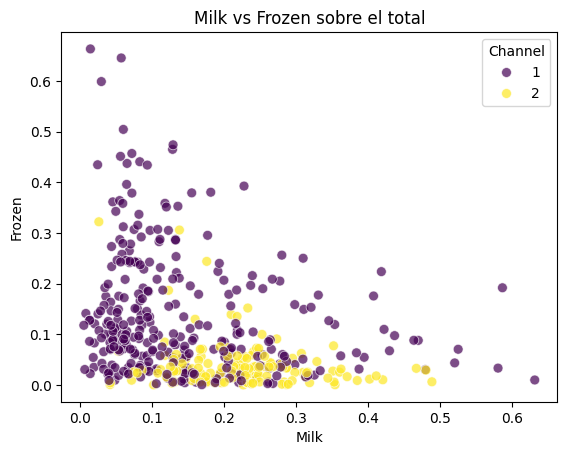

In [23]:
ax = sns.scatterplot(data=df_porcentajes, x='Milk', y='Frozen', hue='Channel', palette='viridis', s=50, alpha=0.7)
plt.title("Milk vs Frozen sobre el total")
plt.show()

## Ejercicio

Aplicar Agglomerative Clustering y k-means y ver como se agrupan. Puedes jugar aplicando el algoritmo solamente sobre unas características determinadas.

### Agglomerative Clustering

In [47]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2, linkage="ward")
agglo.fit(df_porcentajes[['Milk', 'Frozen']])

AgglomerativeClustering()

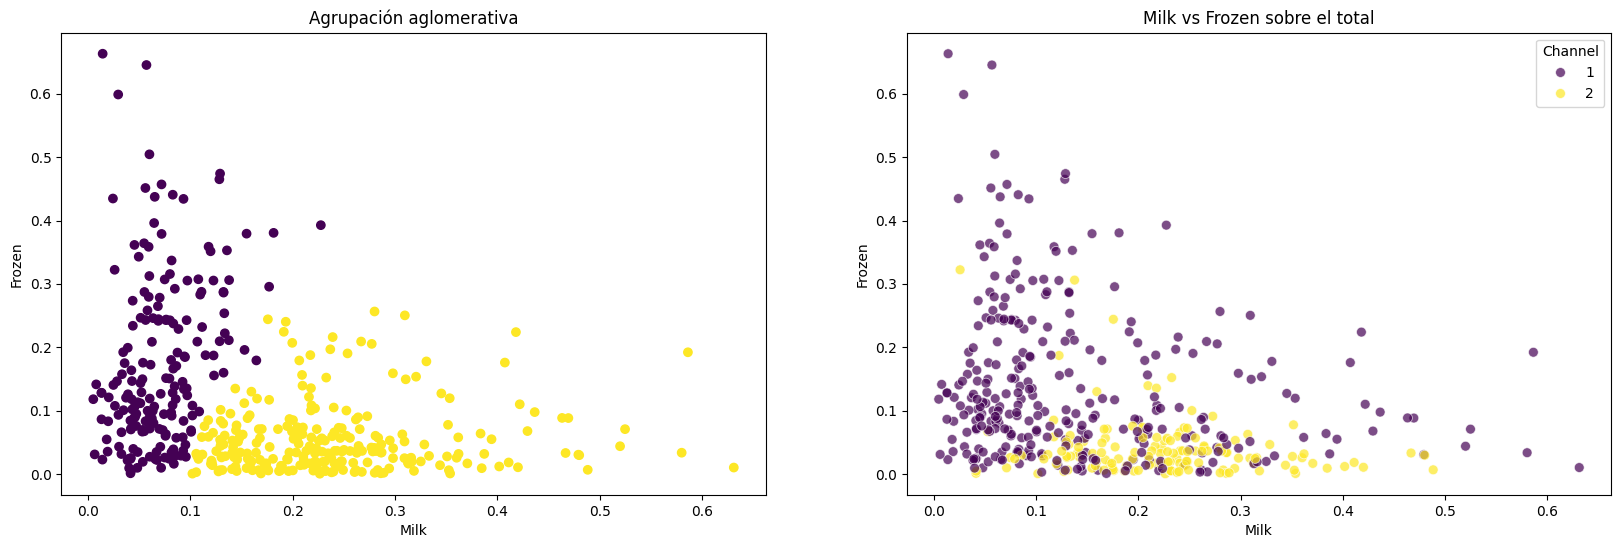

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].scatter(df_porcentajes['Milk'], df_porcentajes['Frozen'], c=agglo.labels_)
axes[0].set_xlabel("Milk")
axes[0].set_ylabel("Frozen")
axes[0].set_title("Agrupación aglomerativa")

sns.scatterplot(data=df_porcentajes, x='Milk', y='Frozen', hue='Channel', ax=axes[1], palette='viridis', s=50, alpha=0.7)
axes[1].set_title("Milk vs Frozen sobre el total")
plt.show()

In [58]:
# Aplicamos aglomerativo sobre todas las dimensiones

agglo_todo = AgglomerativeClustering(n_clusters=2, linkage="ward")
agglo_todo.fit(df_porcentajes[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])


AgglomerativeClustering()

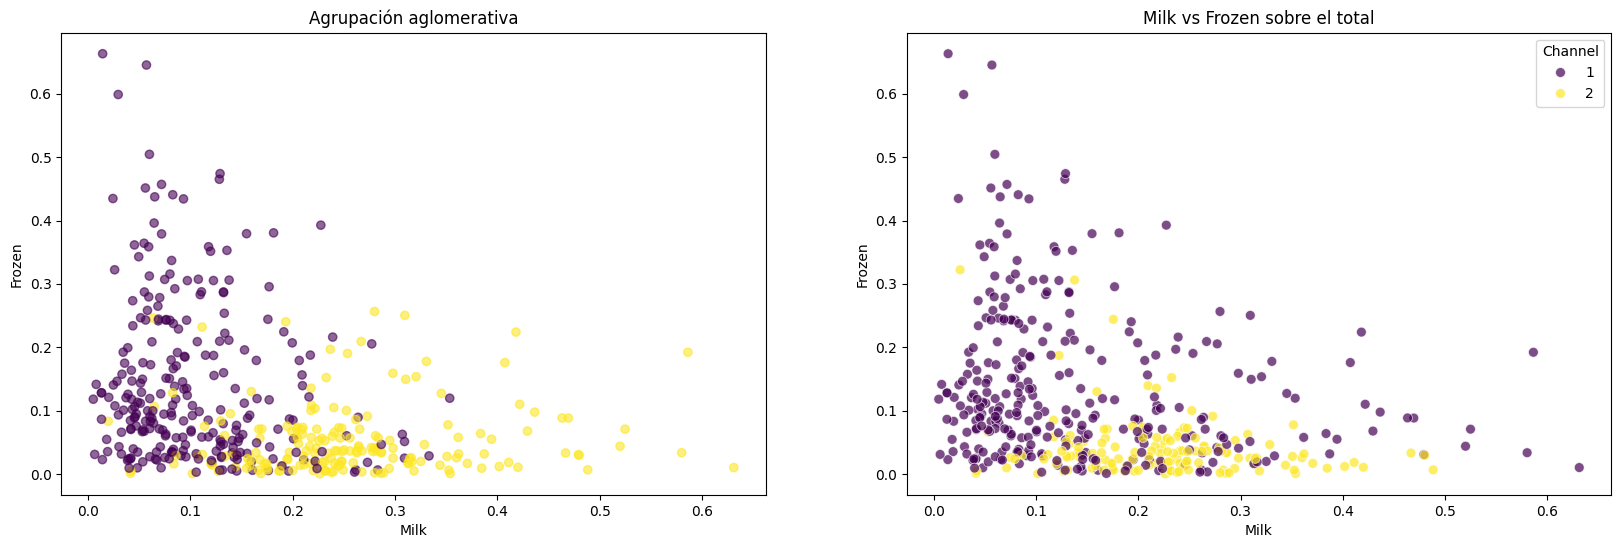

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].scatter(df_porcentajes['Milk'], df_porcentajes['Frozen'], c=agglo_todo.labels_, alpha=0.6)
axes[0].set_xlabel("Milk")
axes[0].set_ylabel("Frozen")
axes[0].set_title("Agrupación aglomerativa")

sns.scatterplot(data=df_porcentajes, x='Milk', y='Frozen', hue='Channel', ax=axes[1], palette='viridis', s=50, alpha=0.7)
axes[1].set_title("Milk vs Frozen sobre el total")
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score
ari = adjusted_rand_score(df_porcentajes['Channel'], agglo_todo.labels_)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.2595


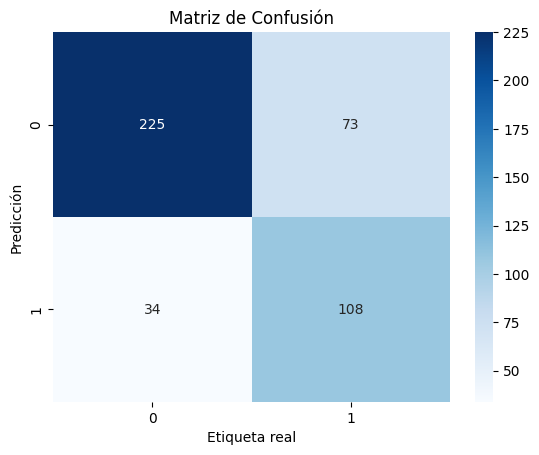

In [69]:
orig_labels = df_porcentajes['Channel'].copy()
orig_labels = orig_labels - 1 # Para que coincidan con las etiquetas generadas por Agglomerative Clustering



cm = pd.crosstab(orig_labels, agglo_todo.labels_, rownames=['Canal real'], colnames=['Canal Predicho'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Etiqueta real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [68]:
accuracy = accuracy_score(orig_labels, agglo_todo.labels_)
print(f"Precisión (mapeando etiquetas): {accuracy:.4f} ({accuracy*100:.2f}%)")

Precisión (mapeando etiquetas): 0.7568 (75.68%)


### K-Means

In [84]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=20)
kmeans.fit(df_porcentajes);

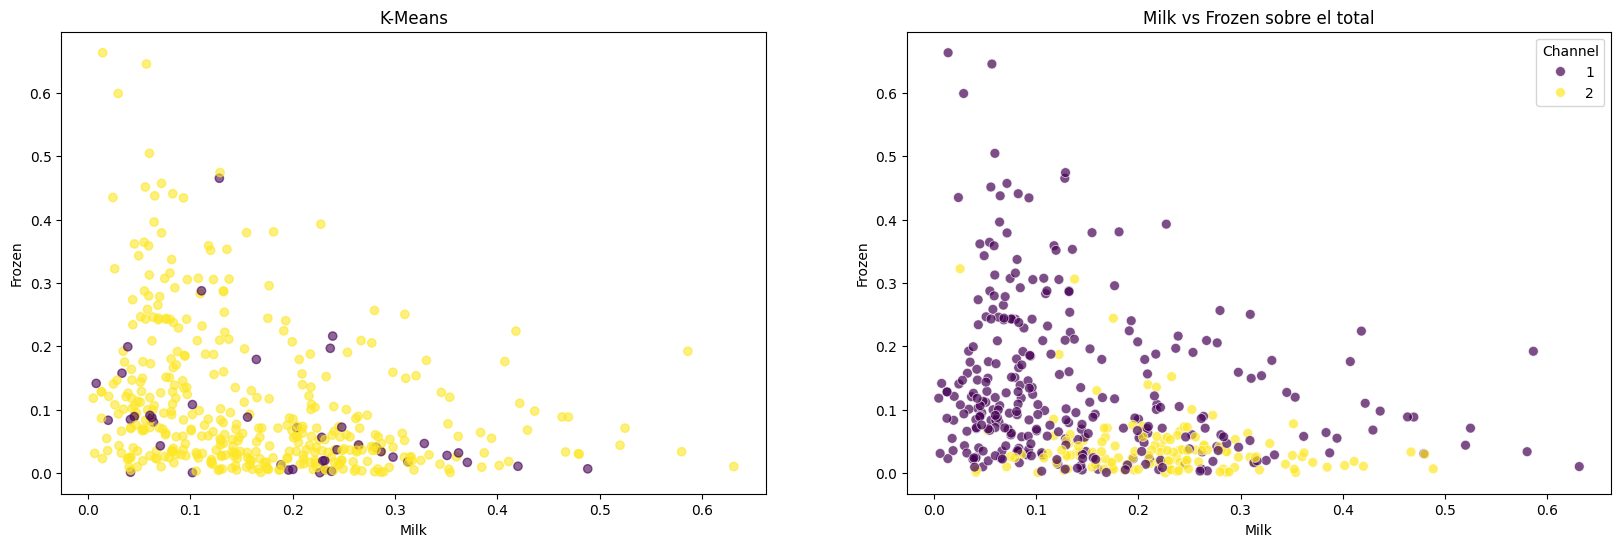

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].scatter(df_porcentajes['Milk'], df_porcentajes['Frozen'], c=kmeans.labels_, alpha=0.6)
axes[0].set_xlabel("Milk")
axes[0].set_ylabel("Frozen")
axes[0].set_title("K-Means")

sns.scatterplot(data=df_porcentajes, x='Milk', y='Frozen', hue='Channel', ax=axes[1], palette='viridis', s=50, alpha=0.7)
axes[1].set_title("Milk vs Frozen sobre el total")
plt.show()